### 군집

- 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터(집단)으로 묶는 알고리즘
- 다른 클러스터 간에는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 클러스터에도 속하지 못하는 관측값이 존재할 수 있음
- 특이 데이터(이상값, 중간값)를 찾는데 활용하기도 함

- 비지도학습유형
- 관측값을 몇 개의 집단으로 나눈다는 점에서 분류 알고리즘과 비슷하지만 군집 분석은 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단

- 소비자 행동 특성을 그룹화하는데 사용

#### K-Means

- 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용
- 벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당
- 다른 클러스터 간에서는 서로 완전하게 구분하기 위하여 일정한 거리 이상 떨어져야 함
- 한편 몇 개의 클러스터로 데이터를 구분할 것인지를 결정하는 k값에 따라 모형의 성능이 달라짐
- 일반적으로 k가 클수록 모형의 정확도는 개선되지만, k값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과가 사라짐

##### 데이터 준비

In [2]:
# 7.7_kmeans_clustering.py

# 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

- 데이터프레임 전체를 모형의 학습 데이터로 사용
- 비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 설명 변수로 활용

In [3]:
# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


##### 모형 학습 및 검증

In [4]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 4 2 2 1 1 2 2 1 1 4 2 1 1 2 4 2 2 1 4 1 2 1 1 1 1 1 2
 2 1 1 2 1 1 1 2 2 1 2 4 4 1 1 1 1 1 4 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 3 1
 1 1 1 2 2 1 1 1 2 1 1 0 2 0 0 2 2 0 0 0 2 0 0 0 2 0 4 0 0 2 0 2 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 2 0 0 0 0 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2
 1 2 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 2 1
 4 0 2 1 1 1 1 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

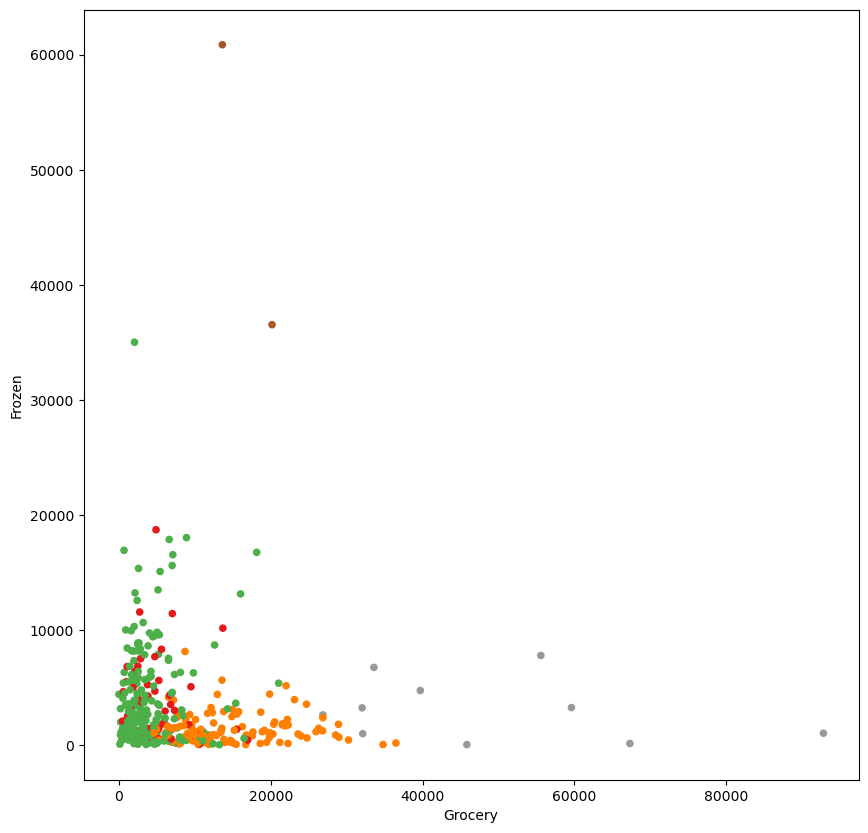

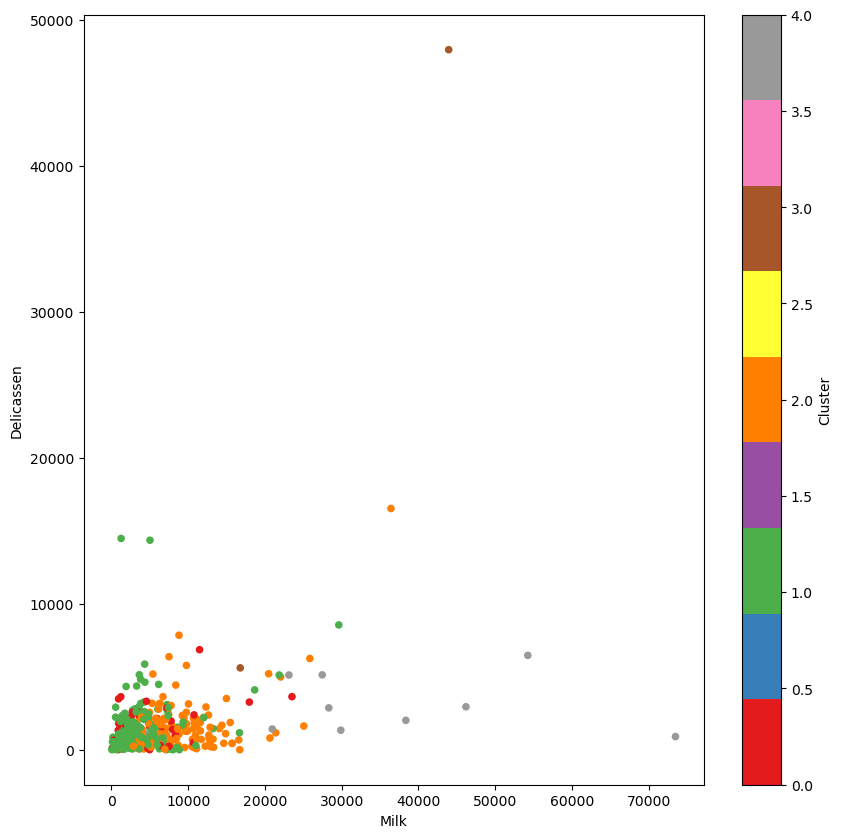

In [5]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

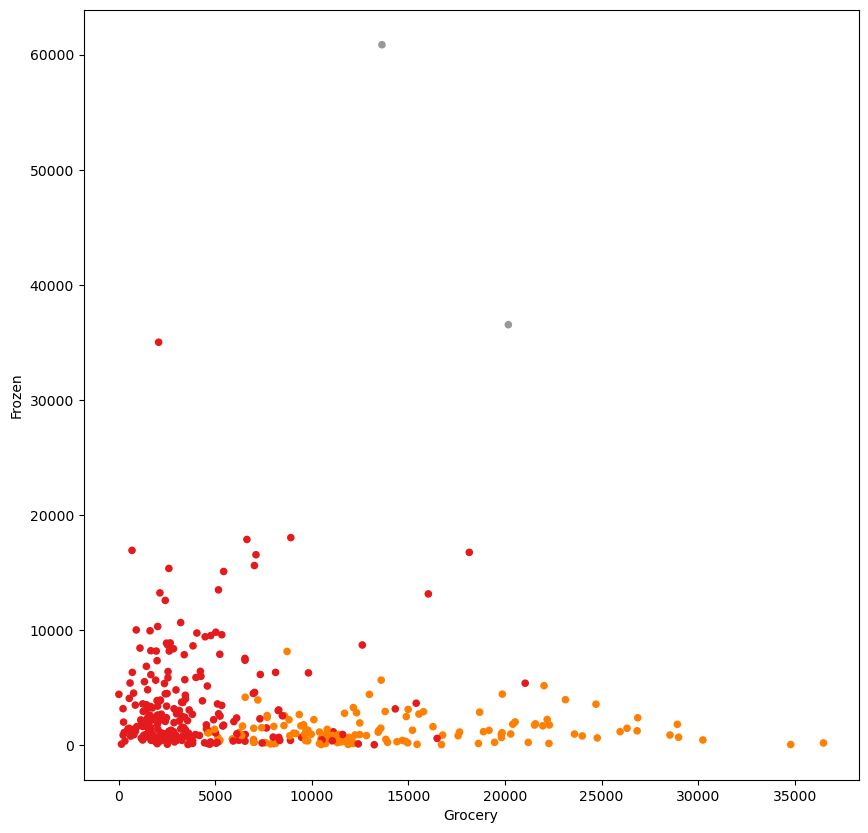

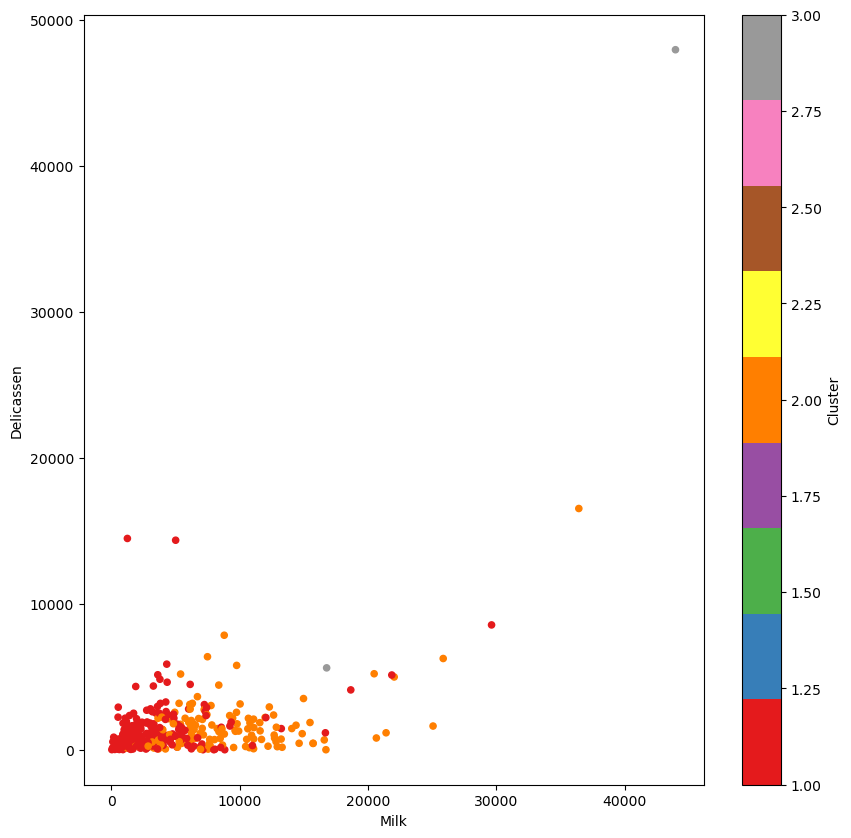

In [6]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()


#### DBSCAN

DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
- 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분
- 자기를 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재라는 점을 코어 포인트(core point)라고 함
- 코어 포인트는 아니지만 반지름 R 안에 다른 코어 포인트가 있을 경우 경계 포인트(border point)라고 함
- 코어 포인트고 아니고 경계 포인트에도 속하지 않는 점을 Noise(또는 outlier)라고 분류

- 하나의 클러스터는 반지름 R 안에 서로 위치하는 모든 코어 포인트를 포함하는 방식으로 구성
- 각 코어 포인트 주위에 있는 경계 포인트를 포함
- 서로 밀접한 데이터끼리 하나의 클러스터를 구성하게 되고 어느 클러스터에도 속하지 않는 점들은 Noise로 남음

##### 데이터 준비

In [7]:
# 7.8_dbscan_clustering.py

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# 서울시내 중학교 진학률 데이터셋 (출처: 교육???)
file_path = '/Users/youju/Downloads/5674-833_4th/part7/2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, engine='openpyxl', header=0)

# IPython Console 디스플레이 옵션 설정하기
pd.set_option('display.width', None) # 출력화면의 너비
pd.set_option('display.max_rows', 100) # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10) # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20) # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 열 이름 배열을 출력
print(df.columns.values)   

['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


In [8]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

  기타진학  취업   미상       위도        경도  
0    0.004     0  0.000  37.594942  127.038909  
1    0.031     0  0.000  37.577473  127.003857  
2    0.009     0  0.003  37.491637  127.071744  
3    0.019     0  0.000  37.480439  127.062201  
4    0.010     0  0.000  37.510750  127.008900  

[5 rows x 21 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-nul

In [12]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b5/a8/5f764f333204db0390362a4356d03a43626997f26818a0e9396f1b3bd8c9/folium-0.20.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/7e/50/fc9680058e63161f2f63165b84c957a0df1415431104c408e8104a3a18ef/branca-0.8.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import folium

# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 중학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=5, # 원의 반지름
                        color='brown', # 원의 둘레 색상
                        fill=True,
                        fill_color='coral', # 원을 채우는 색
                        fill_opacity=0.7, # 투명도    
                        popup=name
    ).add_to(mschool_map)

# 지도를 html 파일로 저장하기
mschool_map.save('./seoul_mschool_location.html')

In [17]:
'''
[Step 3] 데이터 전처리
'''

# 원핫인코딩(더미 변수)
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder() # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder() # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())   

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

  location  code  type  day  Cluster  
0       16     0     1    0       -1  
1       22     0     1    0        0  
2        0     0     0    0       -1  
3        0     0     0    0       -1  
4       14     0     0    0        1  

[5 rows x 26 columns]


##### 모형 학습 및 검증

In [18]:
'''
[Step 4] DBSCAN 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기 
from sklearn import cluster

# 분석에 사용할 속성을 선택 (과학고, 외고국제고, 자사고 진학률)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)   
 
# 예측 (군집) 
cluster_label = dbm.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   

   특성화고  과학고  마이스터고
0     0.148   0.018       0.011
1     0.199   0.000       0.000
2     0.047   0.009       0.006
3     0.097   0.013       0.019
4     0.017   0.007       0.000


[-1  0 -1 -1  1  5 -1 -1  2 -1 -1 -1  2  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0
  1  2 -1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  3
 -1 -1 -1  3 -1  1 -1 -1  4 -1 -1  4 -1 -1  4  0 -1  5  0  6  1 -1  0  1
 -1  0  8 -1 -1 -1  4 -1  3 -1 -1  3  4 -1 -1 -1  3 -1  0  2 -1  0 -1 -1
  5  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1
 -1 -1  5  8  0 -1 -1 -1 -1 -1  7  3  0 -1  5  0  4 -1  5 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1  8  4 -1 -1  6 -1 -1 -1 -1 -1  0  6 -1 -1 -1 -1 -1 -1  6
 -1 -1  7 -1 -1  6 -1  0  0 -1  3 -1  6  8 -1  6 -1 -1 -1 -1 -1 -1  5  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  6  0 -1 -1 -1 -1 -1  4 -1 -1  3 -1 -1
  0 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  9  0
  9 -1 -1 -1 -1  5  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  4 -1 -1  0
 -1 -1  0  0 -1

In [19]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용 출력 (첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped_cols].head())
    print('\n')

# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'tan'}

cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5, # 원의 반지름
                        color=colors[clus], # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus], # 원을 채우는 색
                        fill_opacity=0.7, # 투명도    
                        popup=name
    ).add_to(cluster_map)

# 지도를 html 파일로 저장하기
cluster_map.save('./seoul_mschool_cluster.html')


* key : -1
* number : 234
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
0           0  성북구     3     0.148   0.018       0.011
2           2  강남구     3     0.047   0.009       0.006
3           3  강남구     3     0.097   0.013       0.019
6           6  강남구     3     0.015   0.015       0.000
7           7  강남구     3     0.000   0.032       0.000


* key : 0
* number : 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
1            1  종로구     3     0.199     0.0         0.0
13          13  서초구     3     0.032     0.0         0.0
23          23  강남구     3     0.025     0.0         0.0
28          28  서초구     3     0.040     0.0         0.0
29          29  강남구     3     0.051     0.0         0.0


* key : 1
* number : 7
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
4            4  서초구     3     0.017   0.007         0.0
24          24  강남구     3     0.026   0.007         0.0
27          27  강남구     3     0.006   0.006         0.0
53          53  강동구     3     0.020   0.007         0.0
68          68  

In [20]:
# X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')


X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)  
df['Cluster2'] = dbm2.labels_   

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):  
    folium.CircleMarker([lat, lng],
                        radius=5, # 원의 반지름
                        color=colors[clus], # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus], # 원을 채우는 색
                        fill_opacity=0.7, # 투명도    
                        popup=name
    ).add_to(cluster2_map)

# 지도를 html 파일로 저장하기
cluster2_map.save('./seoul_mschool_cluster2.html')

   특성화고  과학고  마이스터고  code
0     0.148   0.018       0.011     0
1     0.199   0.000       0.000     0
2     0.047   0.009       0.006     0
3     0.097   0.013       0.019     0
4     0.017   0.007       0.000     0


* key : -1
* number : 238
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
0           0  성북구     3     0.148   0.018       0.011     0
2           2  강남구     3     0.047   0.009       0.006     0
3           3  강남구     3     0.097   0.013       0.019     0
6           6  강남구     3     0.015   0.015       0.000     0
7           7  강남구     3     0.000   0.032       0.000     0


* key : 0
* number : 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
1            1  종로구     3     0.199     0.0         0.0     0
13          13  서초구     3     0.032     0.0         0.0     0
23          23  강남구     3     0.025     0.0         0.0     0
28          28  서초구     3     0.040     0.0         0.0     0
29          29  강남구     3     0.051     0.0         0.0     0


* key : 1
* numb

In [21]:
# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)  
df['Cluster3'] = dbm3.labels_   

grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped3_cols].head())
    print('\n')

cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):  
    folium.CircleMarker([lat, lng],
                        radius=5, # 원의 반지름
                        color=colors[clus], # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus], # 원을 채우는 색
                        fill_opacity=0.7, # 투명도    
                        popup=name
    ).add_to(cluster3_map)

# 지도를 html 파일로 저장하기
cluster3_map.save('./seoul_mschool_cluster3.html')

   특성화고  과학고
0     0.148   0.018
1     0.199   0.000
2     0.047   0.009
3     0.097   0.013
4     0.017   0.007


* key : -1
* number : 73
    Unnamed: 0    지역  코드  특성화고  과학고
0            0  성북구     3     0.148   0.018
3            3  강남구     3     0.097   0.013
6            6  강남구     3     0.015   0.015
7            7  강남구     3     0.000   0.032
10          10  강남구     3     0.000   0.031


* key : 0
* number : 205
    Unnamed: 0    지역  코드  특성화고  과학고
1            1  종로구     3     0.199     0.0
13          13  서초구     3     0.032     0.0
22          22  강남구     3     0.158     0.0
23          23  강남구     3     0.025     0.0
28          28  서초구     3     0.040     0.0


* key : 1
* number : 104
    Unnamed: 0    지역  코드  특성화고  과학고
2            2  강남구     3     0.047   0.009
5            5  강남구     3     0.066   0.007
11          11  강남구     3     0.064   0.007
15          15  서초구     3     0.046   0.009
32          32  서초구     3     0.131   0.003


* key : 2
* number : 11
    Unnamed: